
# Bayesian Cricket analytics
In IPL(Indian Premier League) data.

We are trying to predict margin of win for team with the toss decision and ground conditions.


 Packages to be used in below process :

In [3]:
import numpy as np
import pandas as pd
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
import pymc3 as pm, theano.tensor as tt
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
%matplotlib inline

# Getting the data

Reading the data from the csv file

In [4]:
matches = pd.read_csv('data/matches.csv')
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,1,4/5/17,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,1,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,2,4/6/17,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,1,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,3,4/7/17,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,1,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,4,4/8/17,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,1,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,5,4/8/17,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,0,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,1,4/9/17,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,1,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,6,4/9/17,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,1,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,4,4/10/17,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,0,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,2,4/11/17,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,1,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,6,4/12/17,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,1,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


# Data exploration

Analysing the total wins by total matches played by each team

In [5]:
matches_played=pd.concat([matches['team1'],matches['team2']])
matches_played=matches_played.value_counts().reset_index()
matches_played.columns=['Team','Total Matches']
matches_played['wins']=matches['winner'].value_counts().reset_index()['winner']
matches_played.set_index('Team',inplace=True)
matches_played

,Total Matches,wins
Team,,
Mumbai Indians,139,87
Royal Challengers Bangalore,131,72
Kolkata Knight Riders,130,67
Kings XI Punjab,129,62
Delhi Daredevils,127,58
Chennai Super Kings,112,54
Rajasthan Royals,100,50
Sunrisers Hyderabad,71,40
Deccan Chargers,59,20


Mumbai Indians won the most number of matche. 
Lets look at the winner of each season

In [6]:
season_winner=matches.drop_duplicates(subset=['season'],keep='last')[['season','winner']].reset_index(drop=True)
season_winner

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad


Plotting the number of matches won by each team

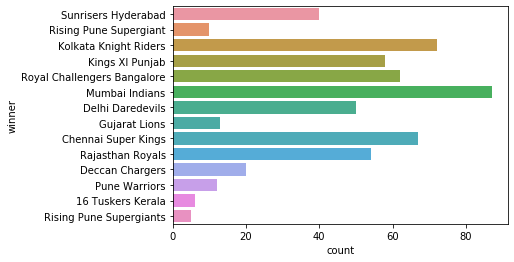

In [7]:
#plt.plot(matches_played)
sns.countplot(y='winner', data = matches)
plt.show()


Now lets take the statistics of the team **'Chennai Super Kings'** winnings data and build our model

In [8]:
matches_csk = matches[(matches['winner']=="Chennai Super Kings")]

In [9]:
matches_csk

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
60,61,2008,9,4/19/08,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,0,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
66,67,2008,12,4/23/08,Chennai Super Kings,Mumbai Indians,Mumbai Indians,1,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
70,71,2008,12,4/26/08,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,0,normal,0,Chennai Super Kings,0,9,JDP Oram,"MA Chidambaram Stadium, Chepauk",BF Bowden,AV Jayaprakash,NaN
73,74,2008,5,4/28/08,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,0,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin,NaN
86,87,2008,8,5/8/08,Delhi Daredevils,Chennai Super Kings,Chennai Super Kings,1,normal,0,Chennai Super Kings,0,4,MS Dhoni,Feroz Shah Kotla,Aleem Dar,RB Tiffin,NaN
90,91,2008,12,5/10/08,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,1,normal,0,Chennai Super Kings,18,0,L Balaji,"MA Chidambaram Stadium, Chepauk",AV Jayaprakash,BG Jerling,NaN
102,103,2008,7,5/18/08,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,0,normal,1,Chennai Super Kings,3,0,M Ntini,Eden Gardens,Asad Rauf,K Hariharan,NaN
113,114,2008,1,5/27/08,Deccan Chargers,Chennai Super Kings,Deccan Chargers,0,normal,0,Chennai Super Kings,0,7,SK Raina,"Rajiv Gandhi International Stadium, Uppal",BG Jerling,AM Saheba,NaN
115,116,2008,6,5/31/08,Kings XI Punjab,Chennai Super Kings,Kings XI Punjab,0,normal,0,Chennai Super Kings,0,9,M Ntini,Wankhede Stadium,Asad Rauf,DJ Harper,NaN
124,182,2010,7,3/16/10,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,0,normal,0,Chennai Super Kings,55,0,MS Dhoni,Eden Gardens,HDPK Dharmasena,AM Saheba,NaN


In [10]:
# Creating a column 'wicket to runs' by multiplying the 'win by wickets' by a suitable proportionate number
matches_csk["wickets to runs"] = matches_csk["win_by_wickets"]*8
 
matches_csk


/Users/ikyathvarmadantuluri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,wickets to runs
60,61,2008,9,4/19/08,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,0,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN,0
66,67,2008,12,4/23/08,Chennai Super Kings,Mumbai Indians,Mumbai Indians,1,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN,0
70,71,2008,12,4/26/08,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,0,normal,0,Chennai Super Kings,0,9,JDP Oram,"MA Chidambaram Stadium, Chepauk",BF Bowden,AV Jayaprakash,NaN,72
73,74,2008,5,4/28/08,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,0,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin,NaN,0
86,87,2008,8,5/8/08,Delhi Daredevils,Chennai Super Kings,Chennai Super Kings,1,normal,0,Chennai Super Kings,0,4,MS Dhoni,Feroz Shah Kotla,Aleem Dar,RB Tiffin,NaN,32
90,91,2008,12,5/10/08,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,1,normal,0,Chennai Super Kings,18,0,L Balaji,"MA Chidambaram Stadium, Chepauk",AV Jayaprakash,BG Jerling,NaN,0
102,103,2008,7,5/18/08,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,0,normal,1,Chennai Super Kings,3,0,M Ntini,Eden Gardens,Asad Rauf,K Hariharan,NaN,0
113,114,2008,1,5/27/08,Deccan Chargers,Chennai Super Kings,Deccan Chargers,0,normal,0,Chennai Super Kings,0,7,SK Raina,"Rajiv Gandhi International Stadium, Uppal",BG Jerling,AM Saheba,NaN,56
115,116,2008,6,5/31/08,Kings XI Punjab,Chennai Super Kings,Kings XI Punjab,0,normal,0,Chennai Super Kings,0,9,M Ntini,Wankhede Stadium,Asad Rauf,DJ Harper,NaN,72
124,182,2010,7,3/16/10,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,0,normal,0,Chennai Super Kings,55,0,MS Dhoni,Eden Gardens,HDPK Dharmasena,AM Saheba,NaN,0


Getting the 'Runs difference in winning' by summing up the 'win by runs' and 'wickets to runs' column to obtain a single independent variable

In [11]:
matches_csk["Runs difference in winning"] = matches_csk["win_by_runs"] + matches_csk["wickets to runs"]

/Users/ikyathvarmadantuluri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
matches_csk

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,wickets to runs,Runs difference in winning
60,61,2008,9,4/19/08,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,0,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN,0,33
66,67,2008,12,4/23/08,Chennai Super Kings,Mumbai Indians,Mumbai Indians,1,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN,0,6
70,71,2008,12,4/26/08,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,0,normal,0,Chennai Super Kings,0,9,JDP Oram,"MA Chidambaram Stadium, Chepauk",BF Bowden,AV Jayaprakash,NaN,72,72
73,74,2008,5,4/28/08,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,0,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin,NaN,0,13
86,87,2008,8,5/8/08,Delhi Daredevils,Chennai Super Kings,Chennai Super Kings,1,normal,0,Chennai Super Kings,0,4,MS Dhoni,Feroz Shah Kotla,Aleem Dar,RB Tiffin,NaN,32,32
90,91,2008,12,5/10/08,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,1,normal,0,Chennai Super Kings,18,0,L Balaji,"MA Chidambaram Stadium, Chepauk",AV Jayaprakash,BG Jerling,NaN,0,18
102,103,2008,7,5/18/08,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,0,normal,1,Chennai Super Kings,3,0,M Ntini,Eden Gardens,Asad Rauf,K Hariharan,NaN,0,3
113,114,2008,1,5/27/08,Deccan Chargers,Chennai Super Kings,Deccan Chargers,0,normal,0,Chennai Super Kings,0,7,SK Raina,"Rajiv Gandhi International Stadium, Uppal",BG Jerling,AM Saheba,NaN,56,56
115,116,2008,6,5/31/08,Kings XI Punjab,Chennai Super Kings,Kings XI Punjab,0,normal,0,Chennai Super Kings,0,9,M Ntini,Wankhede Stadium,Asad Rauf,DJ Harper,NaN,72,72
124,182,2010,7,3/16/10,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,0,normal,0,Chennai Super Kings,55,0,MS Dhoni,Eden Gardens,HDPK Dharmasena,AM Saheba,NaN,0,55


Plotting the number of runs by which the team has won 

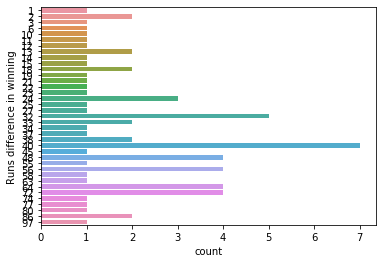

In [13]:
#plt.plot(matches_played)
sns.countplot(y='Runs difference in winning', data = matches_csk)
plt.show()

Plotting histogram for the same

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2007e6d8>]],
      dtype=object)

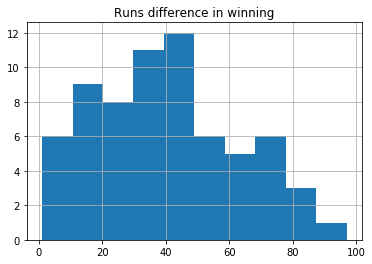

In [14]:
matches_csk.hist(column="Runs difference in winning")

Distribution of stadiums where the CSK team have played the games and Won

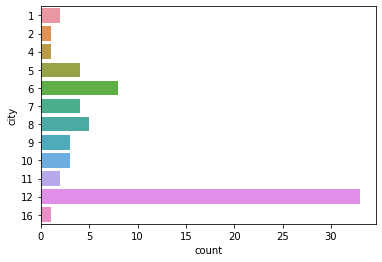

In [15]:
#plt.plot(matches_played)
sns.countplot(y='city', data = matches_csk)
plt.show()

Distribution of toss_decision to bat or field:

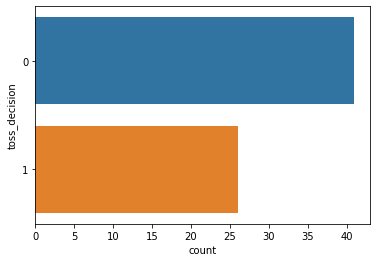

In [16]:
#plt.plot(matches_played)
sns.countplot(y='toss_decision', data = matches_csk)
plt.show()

In [17]:
Y = matches_csk["Runs difference in winning"]

# Let's build a Bayesian model

In [55]:
import pymc3 as pm


# Creating a new Model object which is a container for the model random variables
basic_model = pm.Model()


with basic_model:

    alpha = pm.Normal('alpha',  mu=30, sd=10)
    beta = pm.Bernoulli('beta', p=0.5)
    sigma = pm.HalfNormal('sigma', sd=3)
    c=pm.Normal('c',  mu=30, sd=10)
    
    mu =  alpha*matches_csk["city"] + beta*matches_csk["toss_decision"]+c

    
    Y_obs = pm.Normal('Y_obs', mu=mu,sd = sigma, observed=Y)

# Computing posterior estimates

* Finding the **maximum a posteriori** (MAP) **point estimate** of the model parameters using optimization methods

In [56]:
map_estimate = pm.find_MAP(model=basic_model)

map_estimate

/Users/ikyathvarmadantuluri/anaconda3/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -341.91, ||grad|| = 0.0054136: 100%|██████████| 43/43 [00:00<00:00, 3030.72it/s]  


{'alpha': array(-0.87652823),
 'beta': array(0),
 'sigma_log__': array(2.90778242),
 'c': array(47.4487333),
 'sigma': array(18.31613596)}

Let's look at each estimated value

In [57]:
map_estimate['alpha']

array(-0.87652823)

Notice that our prior for `alpha` was a wide Normal centered at 30 (so really, our initial giess was 30). Our posterior is `map_estimate['alpha']`, quite far from our prior guess and very close to the true value.

In [58]:
with basic_model:
    # draw 5000 posterior samples
    trace = pm.sample(5000, step=pm.Metropolis())

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [c]
>Metropolis: [sigma]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 4 chains, 0 divergences: 100%|██████████| 22000/22000 [00:02<00:00, 9404.86draws/s] 
The number of effective samples is smaller than 10% for some parameters.


The trace object contains the samples collected

# Posterior analysis

PyMC3 provides plotting and summarization functions for inspecting the sampling output. A simple posterior plot can be created using `traceplot`.

In [59]:
np.asarray(trace['alpha']).shape

(20000,)

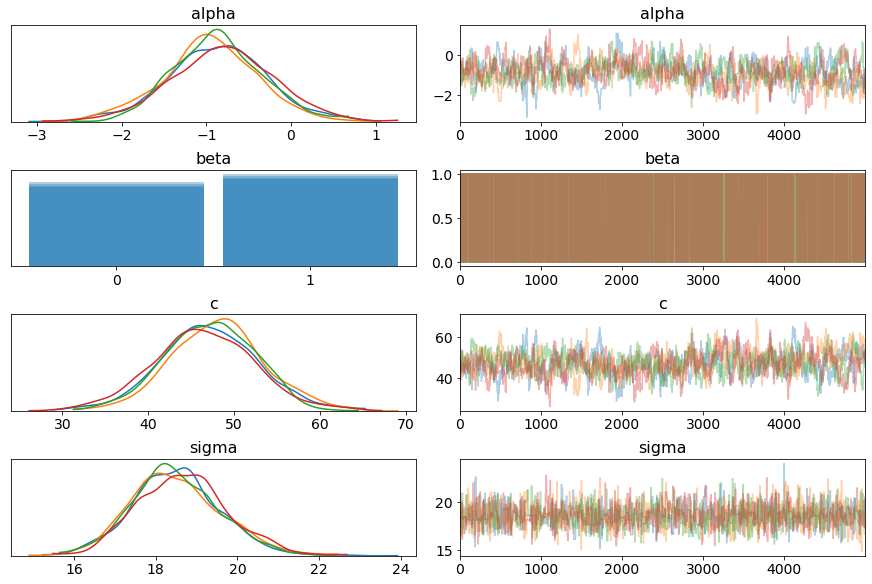

In [60]:
pm.traceplot(trace);

The left column consists of a smoothed histogram (using kernel density estimation) of the marginal posteriors of each stochastic random variable while the right column contains the samples of the Markov chain plotted in sequential order. The beta variable, being vector-valued, produces two histograms and two sample traces, corresponding to both predictor coefficients.

For example, we see that beta[0] is predicted with a much higher certainty than beta[1].

The summary function provides a text-based output of common posterior statistics:

In [61]:
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,-0.874,0.570,-1.962,0.225,0.032,0.024,320.0,282.0,318.0,644.0,1.04
beta,0.524,0.499,0.000,1.000,0.007,0.005,5099.0,5099.0,5099.0,5099.0,1.00
c,47.237,5.598,36.764,58.008,0.331,0.241,287.0,269.0,289.0,634.0,1.04
sigma,18.541,1.082,16.572,20.618,0.027,0.019,1592.0,1592.0,1579.0,1668.0,1.00


alpha result  of MCMC run

In [62]:
trace['alpha'][:1000]

array([-0.60230799, -0.30977016, -0.30977016, -0.30977016, -0.30977016,
       -0.30977016, -0.30977016, -0.30977016, -0.30977016, -0.30977016,
       -0.30977016, -0.30977016, -0.78712246, -0.78712246, -0.78712246,
       -0.78712246, -0.78712246, -0.78712246, -0.78712246, -0.78712246,
       -0.78712246, -0.99503014, -0.99503014, -0.99503014, -0.75488497,
       -1.32694838, -1.32694838, -1.32694838, -1.32694838, -1.17127324,
       -1.17127324, -1.17127324, -1.17127324, -1.17127324, -1.12757787,
       -1.12757787, -1.06160704, -1.06160704, -1.06160704, -1.06160704,
       -1.28034285, -1.28034285, -1.28034285, -0.67708087, -0.67708087,
       -0.67708087, -0.67708087, -0.67708087, -0.67708087, -0.67708087,
       -0.72507562, -0.72507562, -0.74578023, -0.74578023, -0.74578023,
       -0.74578023, -0.74578023, -0.74578023, -0.74578023, -0.74578023,
       -0.74578023, -0.74578023, -0.74578023, -0.74578023, -0.74578023,
       -0.74578023, -0.74578023, -0.74578023, -0.74578023, -0.74

In [63]:
trace['alpha'].mean()

-0.8743029759377058

In [64]:
trace['alpha'][:1000].mean()

-0.8047139880960742

Let us plot fake data from our model

In [65]:
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

In [66]:
mus_improved = (
    trace['alpha'][1000:].mean() + 
    trace['beta'][1000:][0].mean() * matches_csk["toss_decision"] + 
    trace['beta'][1000:][1].mean() * matches_csk["city"]
)
Y_sim_improved = [
    get_truncated_normal(
        mean=mux, 
        sd=trace['sigma'][1000:].mean(), low=-2, upp=3)
    for mux in mus_improved
    ]

Y_sim_random_variates = [Y_sim_improved[i].rvs() for i in range(67)]
len(Y_sim_random_variates)

67

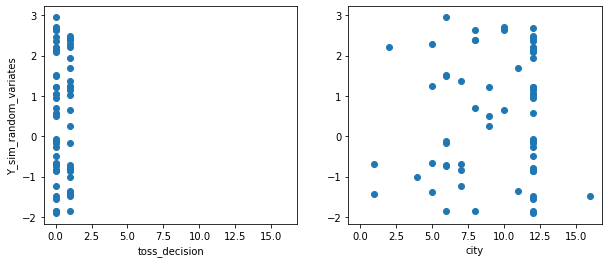

In [67]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(matches_csk["toss_decision"], Y_sim_random_variates)
axes[1].scatter(matches_csk["city"], Y_sim_random_variates)
axes[0].set_ylabel('Y_sim_random_variates'); axes[0].set_xlabel('toss_decision'); axes[1].set_xlabel('city');


Here below, `fake_data` will contains 1000 generated data sets (containing 100 samples each), each using a different parameter setting from the posterior:

In [68]:
fake_data = pm.sample_ppc(trace, samples=1000, model=basic_model, size=100)
fake_data

/Users/ikyathvarmadantuluri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  """Entry point for launching an IPython kernel.
/Users/ikyathvarmadantuluri/anaconda3/lib/python3.7/site-packages/pymc3/sampling.py:1134: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn("samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 1000/1000 [00:01<00:00, 630.17it/s]


{'Y_obs': array([[[ 43.80486155,  25.62300839,  18.40185673, ...,  36.96467193,
           16.80185444,  29.31104412],
         [ 26.32887956,  19.12114168,   3.19936202, ...,  18.97528068,
           59.72649201,  36.75060156],
         [ 38.80318999,  61.15212661,  31.20603666, ...,  29.07634608,
           56.96853634,   3.28287135],
         ...,
         [ 49.13589   ,  51.02068778,  33.23202199, ...,  35.30452566,
           24.39891477,  19.45520358],
         [ 43.89988529,  51.56781381,  17.44863439, ...,  29.84890353,
           31.77982334,  33.60185503],
         [ 40.16223677,  55.92505385,  49.4731158 , ...,  21.17213483,
           34.69178559,  30.70861609]],
 
        [[ 16.90393922,  53.36357291,  14.54556555, ...,  36.8246388 ,
           35.93970209,  21.32833792],
         [ 49.02773107,  29.17656304,  18.17479566, ...,  48.66742638,
          -35.26290645,  -2.74698323],
         [ 41.97250805,  34.15077068,  44.34015384, ...,  40.39066067,
           24.11997109,

Let's plot the first sample of the last simulation.

In [69]:
y_fake = fake_data['Y_obs'][500][0]
len(y_fake)

67

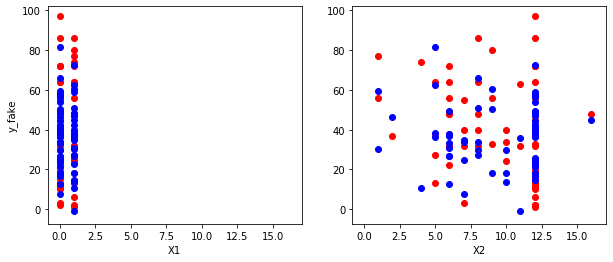

In [70]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(matches_csk["toss_decision"], Y, color='r')
axes[0].scatter(matches_csk["toss_decision"], y_fake, color='b')
axes[1].scatter(matches_csk["city"], Y, color='r')
axes[1].scatter(matches_csk["city"], y_fake, color='b')
axes[0].set_ylabel('y_fake'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

# Conclusion

So based on Bayesian analysis, we can conclude that **toss decision and match venue(city)** are useful to predict the margin of win. 
And we see that beta[0] is predicted with a much higher certainty than beta[1].